# Rainfall Prediction with Machine Learning
In this project, I will be implementing a predictive model on Rain Dataset to predict whether or not it will rain tomorrow in Australia. The Dataset contains about 10 years of daily weather observations of different locations in Australia. By the end of this project, you will be able to build a predictive model.

# Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The Data Let's start by reading in the weatherAUS.csv file into a pandas dataframe.

In [3]:
#import the WeatherAus dataset

df=pd.read_csv('weatherAUS.csv')

In [4]:
#To find the first five data details
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Exploration
We will first check the number of rows and columns. Next, we’ll check the size of the dataset to decide if it needs size compression.

In [5]:
#To find the Dimension of the dataset 

df.shape

(145460, 23)

In [6]:
#To find the information about the Data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#To describe the Dataset 

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data We can use seaborn to create a simple heatmap to see where we are missing data!

# Data Preprocessing

In [9]:
#To check the null values in the Dataset 

df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#To check the total null values in the dataset 

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
#To check the datatype of each column 

df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

<AxesSubplot:>

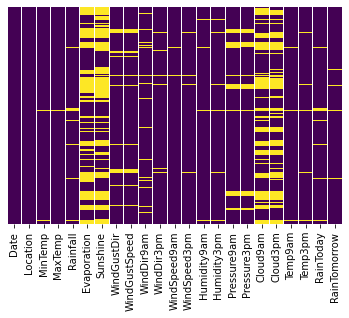

In [12]:
#Missing Data We can use seaborn to create a simple heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

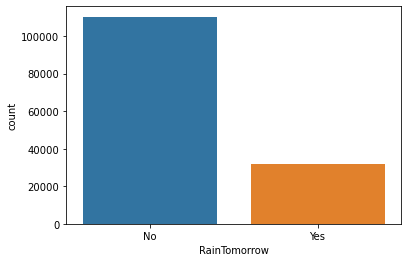

In [13]:
#To plot the graph 
sns.countplot(x='RainTomorrow',data=df)

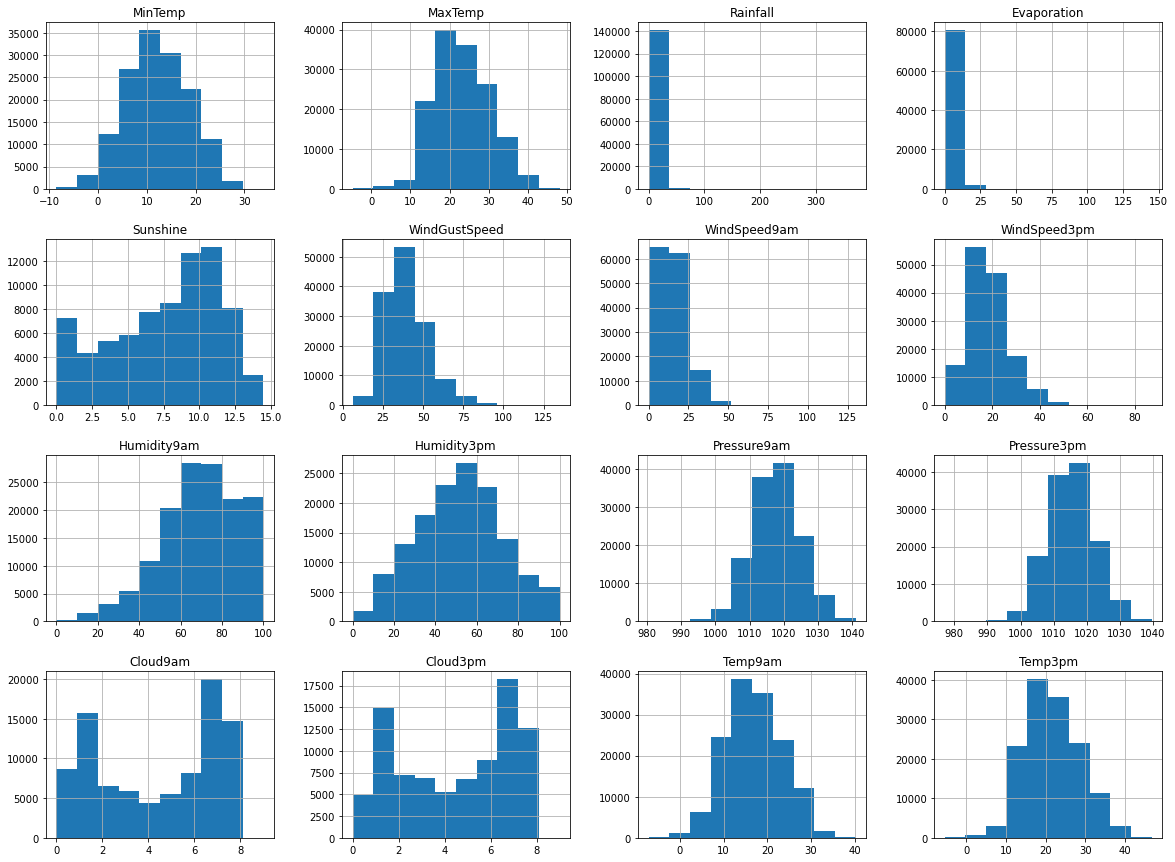

In [14]:
#To plot the graph in numerical datas

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

<AxesSubplot:>

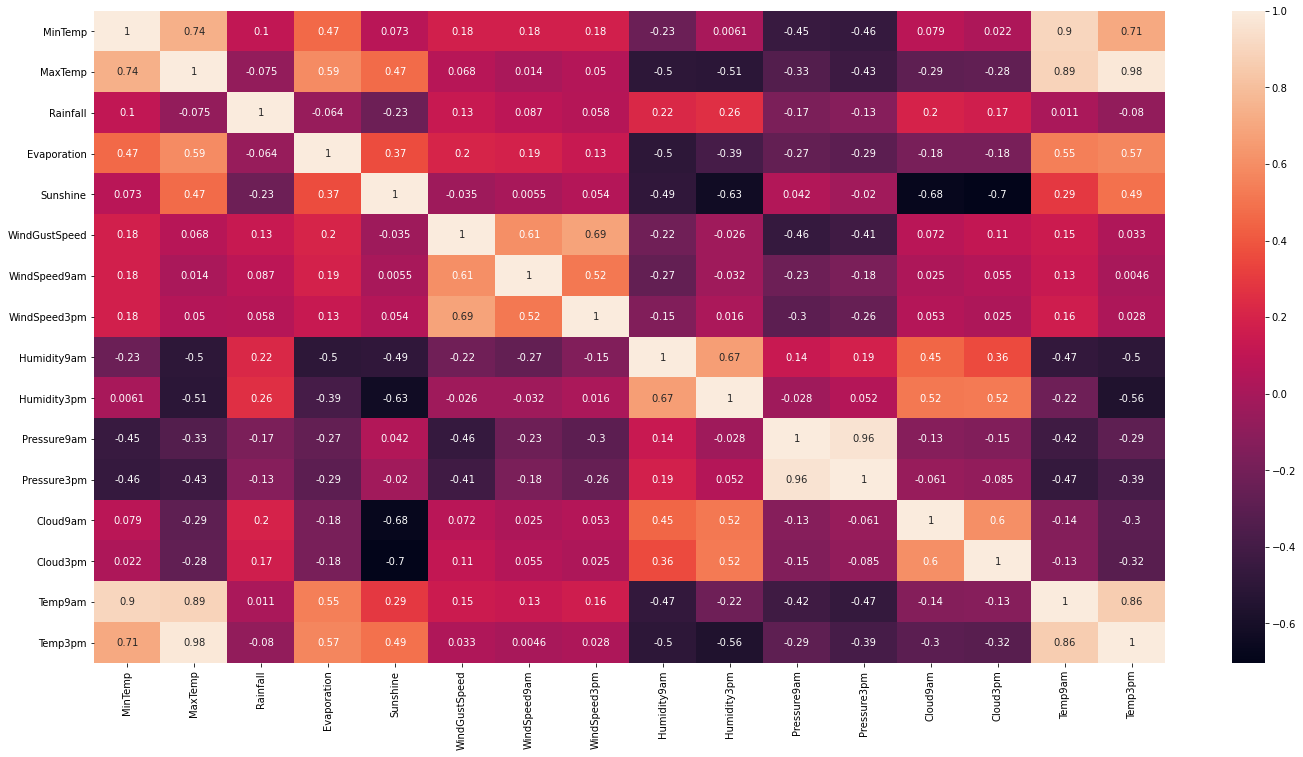

In [15]:
#To check the Correlation in the Dataset using Heatmap

plt.figure(figsize =(24,12))
sns.heatmap(df.corr(), annot = True)

# To find the Outliers in the dataset Using Box plot

<AxesSubplot:>

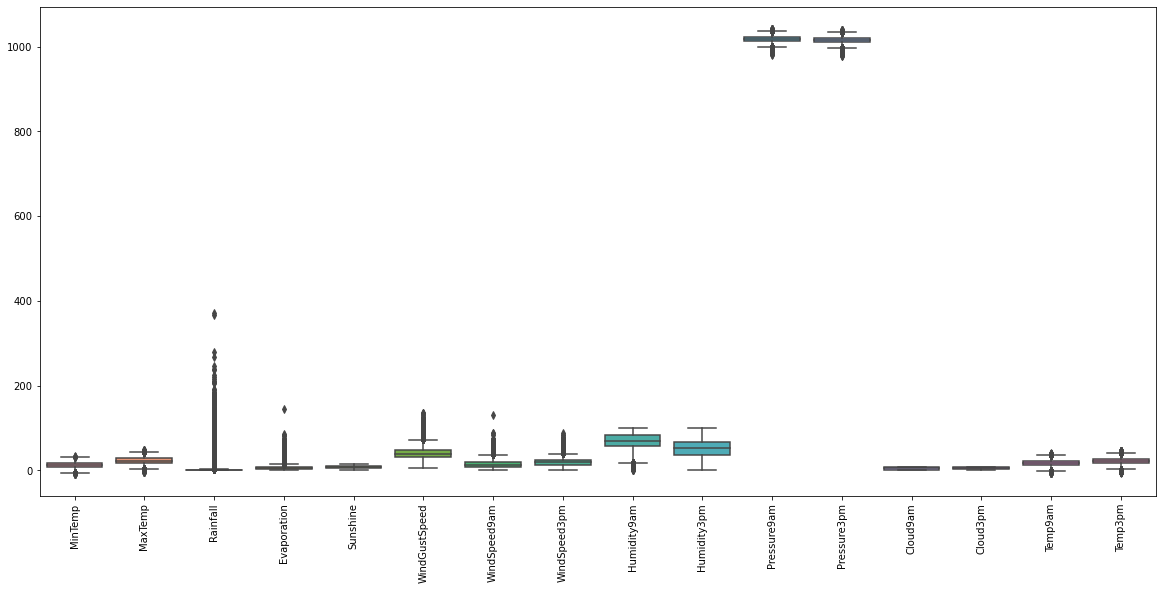

In [16]:
#To find the Outliers using box plot 

plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.boxplot (data=df)

# Data Cleaning

In [17]:
# To Drop the Date and Location Column 

df.drop(['Date','Location'],axis = 1, inplace = True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
#Separating numeric and categorical features

categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
numerical_features=[column_name for column_name in df.columns if df[column_name].dtype != 'O']
print('Numeric:',numerical_features,'\n')
print('Categoric:',categorical_features)

Numeric: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

Categoric: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


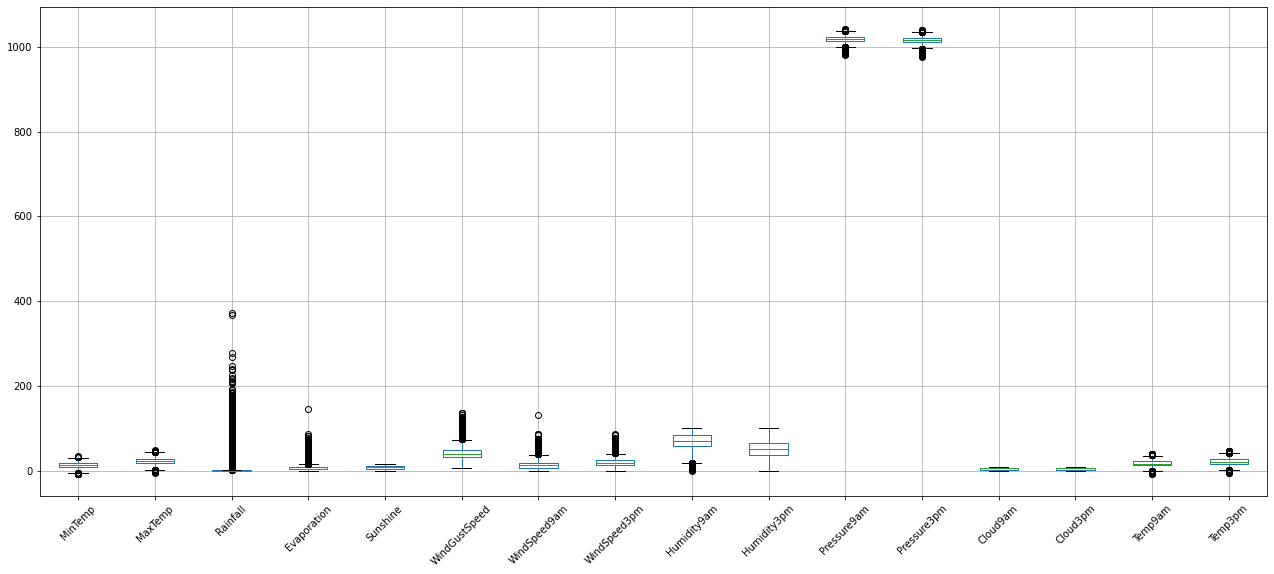

In [19]:
# checking for the outliers in numeric cols

plt.figure(figsize=(22,9));
df.boxplot();
plt.xticks(rotation=45);

# To Handle missing values or nan values

In [20]:
# Handling missing values or nan values

df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [21]:
# Handling NaN values in numerical cols

for  i in numerical_features:
    df[i] = df[i].fillna(df[i].mean())

In [22]:
df.isnull().sum()  # now no nan values in numeric cols

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [23]:
# Handling NaN values in categorical cols

for i in categorical_features:
    df[i] = df[i].fillna(df[i].mode()[0])

In [24]:
df.isnull().sum()  # now no nan values in categorical cols

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [25]:
# Finding number of outliers in each colm using IQR method (Using Quantile)

def detect_outliers_iqr(data):
    outlier_list = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in numerical_features:
    outliers = detect_outliers_iqr(df[i])
    print("Number of Outliers in",i,"attribute :", len(outliers))

Number of Outliers in MinTemp attribute : 82
Number of Outliers in MaxTemp attribute : 544
Number of Outliers in Rainfall attribute : 23723
Number of Outliers in Evaporation attribute : 29631
Number of Outliers in Sunshine attribute : 45567
Number of Outliers in WindGustSpeed attribute : 5523
Number of Outliers in WindSpeed9am attribute : 1817
Number of Outliers in WindSpeed3pm attribute : 2523
Number of Outliers in Humidity9am attribute : 1425
Number of Outliers in Humidity3pm attribute : 0
Number of Outliers in Pressure9am attribute : 2758
Number of Outliers in Pressure3pm attribute : 2524
Number of Outliers in Cloud9am attribute : 0
Number of Outliers in Cloud3pm attribute : 4974
Number of Outliers in Temp9am attribute : 307
Number of Outliers in Temp3pm attribute : 988


In [26]:
# Handling outliers using IQR method (Using Quantile)

def handle_outliers(data):

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    b = np.where(data<lwr_bound, lwr_bound, data)

    b1 = np.where(b>upr_bound, upr_bound, b)
    return b1
    
    
for i in numerical_features:
    df[i]=handle_outliers(df[i])

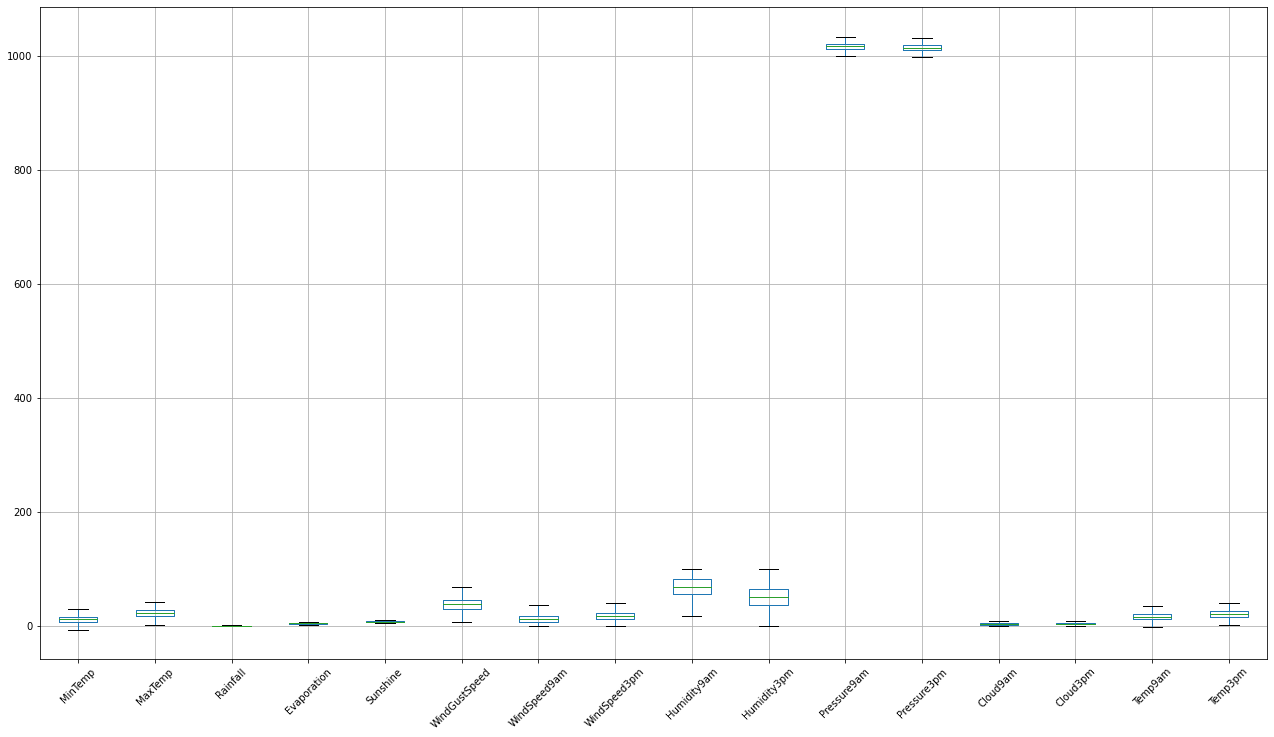

In [27]:
# verifying  

plt.figure(figsize=(22,12));
df.boxplot();
plt.xticks(rotation=45);

# outliers are handled

In [28]:
# Checking for duplicates

df[df.duplicated()]  

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
985,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
2032,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
3525,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
3526,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
4939,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127747,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
127748,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
127749,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No
136063,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,SE,14.043426,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339,No,No


In [29]:
# Drop duplicates

df.drop_duplicates(inplace=True)
df.shape

(145200, 21)

<h3> Now the dataset is cleaned </h3> 

<ul> 
<li> Handled outliers</li> 
<li> Handled NaN values</li> 
<li> Removed Duplicates</li> 
</ul>    
    

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale = StandardScaler()

In [32]:
df[numerical_features]=scale.fit_transform(df[numerical_features]) 

In [33]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.189271,-0.045946,-0.012295,0.218089,-0.224522,W,0.351578,W,WNW,0.706265,...,0.110431,-1.441675,-1.517568,-1.250915,1.566635,-0.016892,-0.014231,0.016766,No,No
1,-0.752623,0.265060,-0.620227,0.218089,-0.224522,WNW,0.351578,NNW,WSW,-1.162245,...,-1.331855,-1.295258,-1.076456,-1.143795,0.000000,-0.016892,0.032306,0.383399,No,No
2,0.110780,0.349880,-0.620227,0.218089,-0.224522,WSW,0.515703,W,WSW,0.589483,...,-1.652363,-1.051230,-1.532779,-1.006068,0.000000,-1.254593,0.621769,0.222081,No,No
3,-0.470055,0.675024,-0.620227,0.218089,-0.224522,NE,-1.289679,SE,E,-0.344771,...,-1.278437,-1.734509,-0.011701,-0.378647,0.000000,-0.016892,0.171915,0.706037,No,No
4,0.832899,1.282900,0.392993,0.218089,-0.224522,W,0.105389,ENE,NW,-0.811899,...,0.698029,-0.904813,-1.046034,-1.419247,1.125645,1.704136,0.125379,1.175327,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.474742,0.024737,-0.620227,0.218089,-0.224522,E,-0.715239,SE,ENE,-0.111208,...,-0.957929,-1.344064,1.053053,0.769073,0.000000,-0.016892,-1.069059,0.104758,No,No
145456,-1.349156,0.293334,-0.620227,0.218089,-0.224522,NNW,-1.453805,SE,N,-0.111208,...,-0.690839,-1.490481,0.885735,0.585438,0.000000,-0.016892,-0.944962,0.412730,No,No
145457,-1.066588,0.519520,-0.620227,0.218089,-0.224522,N,-0.222862,SE,WNW,-0.578335,...,-0.851093,-1.344064,0.505465,0.233470,0.000000,-0.016892,-0.696767,0.647375,No,No
145458,-0.689830,0.533657,-0.620227,0.218089,-0.224522,SE,-0.961428,SSE,N,-0.111208,...,-0.957929,-1.344064,0.262093,0.187561,-0.638316,-1.254593,-0.293450,0.632710,No,No


# One Hot Encoding

One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine learning algorithms which in turn improve predictions as well as classification accuracy of a model.

In [34]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [35]:
# Encoding Categorical Features using replace function:

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [36]:
# Encoding Categorical Features using replace function:
#function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data to numerical data.

def encode_data(categorical_features):
       
    mapping_dict = {}
    unique_values = list(df[categorical_features].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [37]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [38]:
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [39]:
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [40]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.189271,-0.045946,-0.012295,0.218089,-0.224522,0,0.351578,0,0,0.706265,...,0.110431,-1.441675,-1.517568,-1.250915,1.566635,-0.016892,-0.014231,0.016766,0,0
1,-0.752623,0.265060,-0.620227,0.218089,-0.224522,1,0.351578,1,1,-1.162245,...,-1.331855,-1.295258,-1.076456,-1.143795,0.000000,-0.016892,0.032306,0.383399,0,0
2,0.110780,0.349880,-0.620227,0.218089,-0.224522,2,0.515703,0,1,0.589483,...,-1.652363,-1.051230,-1.532779,-1.006068,0.000000,-1.254593,0.621769,0.222081,0,0
3,-0.470055,0.675024,-0.620227,0.218089,-0.224522,3,-1.289679,2,2,-0.344771,...,-1.278437,-1.734509,-0.011701,-0.378647,0.000000,-0.016892,0.171915,0.706037,0,0
4,0.832899,1.282900,0.392993,0.218089,-0.224522,0,0.105389,3,3,-0.811899,...,0.698029,-0.904813,-1.046034,-1.419247,1.125645,1.704136,0.125379,1.175327,0,0


<h3> To Encoding Categorical data to Numerical data is done </h3>

# Classification models

In [41]:
#To apply the Machine Learning Algorithm

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # SVM
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Byes
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from graphviz import Digraph
#pip install xgboost
from xgboost import XGBClassifier #Extreme Gradient Boost

In [42]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.189271,-0.045946,-0.012295,0.218089,-0.224522,0,0.351578,0,0,0.706265,...,0.110431,-1.441675,-1.517568,-1.250915,1.566635,-0.016892,-0.014231,0.016766,0,0
1,-0.752623,0.265060,-0.620227,0.218089,-0.224522,1,0.351578,1,1,-1.162245,...,-1.331855,-1.295258,-1.076456,-1.143795,0.000000,-0.016892,0.032306,0.383399,0,0
2,0.110780,0.349880,-0.620227,0.218089,-0.224522,2,0.515703,0,1,0.589483,...,-1.652363,-1.051230,-1.532779,-1.006068,0.000000,-1.254593,0.621769,0.222081,0,0
3,-0.470055,0.675024,-0.620227,0.218089,-0.224522,3,-1.289679,2,2,-0.344771,...,-1.278437,-1.734509,-0.011701,-0.378647,0.000000,-0.016892,0.171915,0.706037,0,0
4,0.832899,1.282900,0.392993,0.218089,-0.224522,0,0.105389,3,3,-0.811899,...,0.698029,-0.904813,-1.046034,-1.419247,1.125645,1.704136,0.125379,1.175327,0,0


# Feature Selection

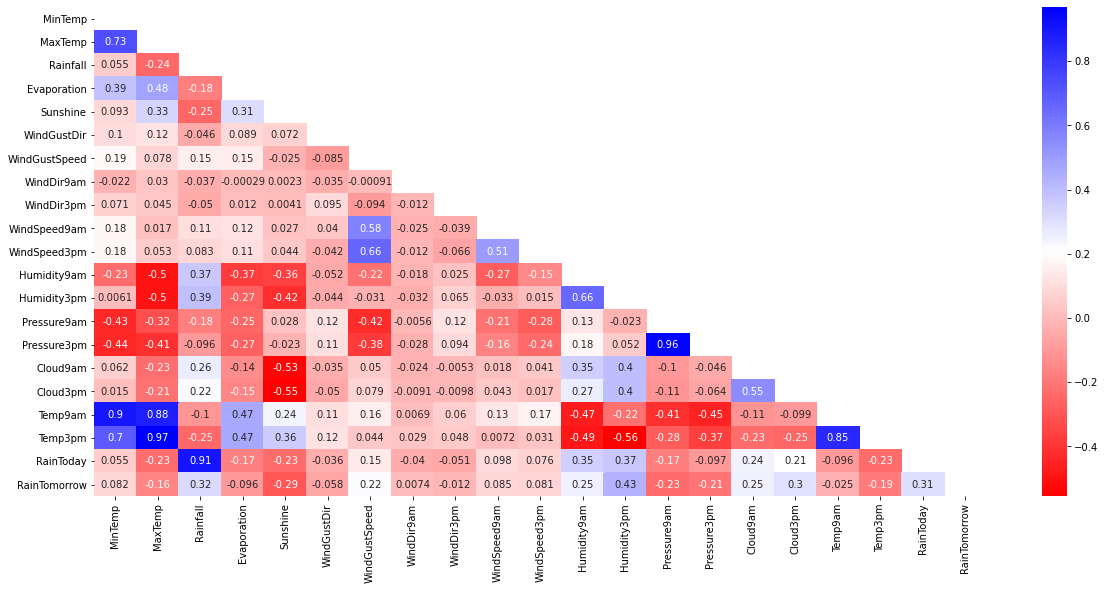

In [43]:
#Finding the Correlation

matrix = np.triu(df.corr())
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),mask=matrix, annot=True, cmap='bwr_r');

In [44]:
#Split dataset in features and target variable

feature_cols=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm', 
       'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am', 'Temp3pm','WindGustDir','WindDir9am','WindDir3pm','RainToday']
X = df[feature_cols] # Features
y = df.RainTomorrow # Target variable

# To change the Train (80%) and Test (20%) Value for the Prediction

In [45]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # 80% training and 20% test

In [46]:
# Decision Tree Classifier Algorithm

dec_tree_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dec_tree_clf = dec_tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dec_tree_clf.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt1_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",dt1_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[19434  3280]
 [ 3000  3326]]
Accuracy: 78.37

               precision    recall  f1-score   support

           0       0.87      0.86      0.86     22714
           1       0.50      0.53      0.51      6326

    accuracy                           0.78     29040
   macro avg       0.68      0.69      0.69     29040
weighted avg       0.79      0.78      0.79     29040



# Confusion Martix (Decision Tree Classifier)

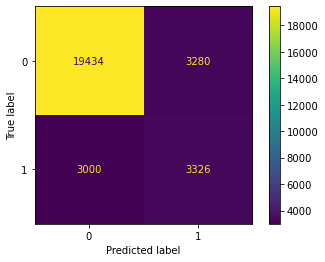

In [47]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree_clf, X_test, y_test)

# Visualize the Performance of the Decision Tree Classifier Model

Text(0, 0.5, 'True Positive Rate')

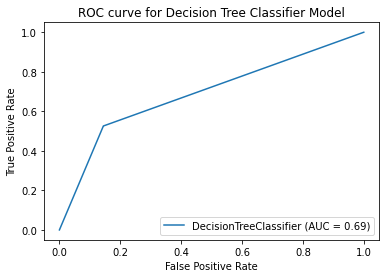

In [48]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(dec_tree_clf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Decision Tree Classifier Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [49]:
#Decision Tree Classifier Algorithm Using Entropy

dec_tree_entrpy = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dec_tree_entrpy = dec_tree_entrpy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dec_tree_entrpy.predict(X_test)


#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
dt2_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",dt2_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[21584  1130]
 [ 3667  2659]]
Accuracy: 83.48

               precision    recall  f1-score   support

           0       0.85      0.95      0.90     22714
           1       0.70      0.42      0.53      6326

    accuracy                           0.83     29040
   macro avg       0.78      0.69      0.71     29040
weighted avg       0.82      0.83      0.82     29040



# Confusion Martix (Decision Tree Classifier (Entropy))

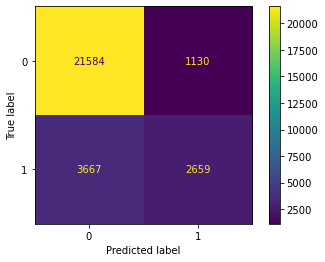

In [50]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree_entrpy, X_test, y_test)

# Visualize the Performance of the (Decision Tree Classifier (Entropy)) Model

Text(0, 0.5, 'True Positive Rate')

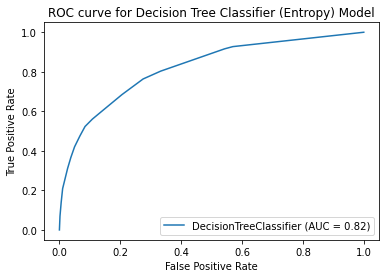

In [51]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(dec_tree_entrpy, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Decision Tree Classifier (Entropy) Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [52]:
#Decision Tree Classifier Algorithm Using Gini

dec_tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=8)

# Train Decision Tree Classifer
dec_tree_gini = dec_tree_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dec_tree_gini.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

#Accuracy
dt3_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",dt3_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[21384  1330]
 [ 3283  3043]]
Accuracy: 84.12

               precision    recall  f1-score   support

           0       0.87      0.94      0.90     22714
           1       0.70      0.48      0.57      6326

    accuracy                           0.84     29040
   macro avg       0.78      0.71      0.74     29040
weighted avg       0.83      0.84      0.83     29040



# Confusion Martix (Decision Tree Classifier (Gini))

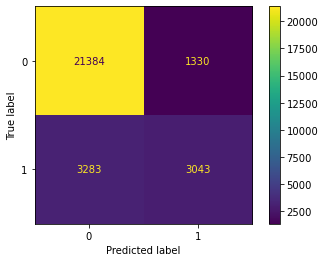

In [53]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree_gini, X_test, y_test)

# Visualize the Performance of the (Decision Tree Classifier (Gini)) Model

Text(0, 0.5, 'True Positive Rate')

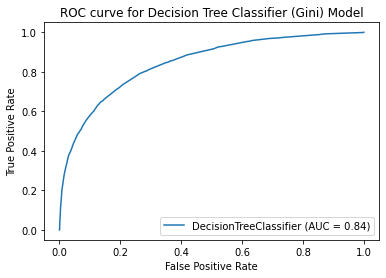

In [64]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(dec_tree_gini, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Decision Tree Classifier (Gini) Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [55]:
# Random Forest

ran_f=RandomForestClassifier(n_estimators=100)

# Train the dataset
ran_f = ran_f.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = ran_f.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",rf_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[21646  1068]
 [ 3193  3133]]
Accuracy: 85.33

               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22714
           1       0.75      0.50      0.60      6326

    accuracy                           0.85     29040
   macro avg       0.81      0.72      0.75     29040
weighted avg       0.84      0.85      0.84     29040



# Confusion Martix (Random Forest Classifier)

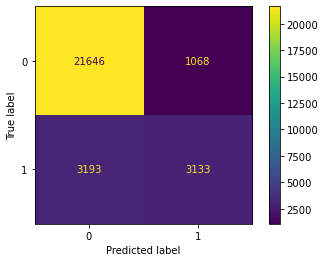

In [57]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ran_f, X_test, y_test)

# Visualize the Performance of the (Random Forest Classifier) Model

Text(0, 0.5, 'True Positive Rate')

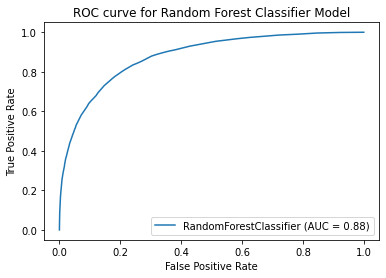

In [63]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(ran_f, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Random Forest Classifier Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [59]:
# Logistic Regression

lr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs') 

# Train the dataset
lr_clf = lr_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = lr_clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",lr_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[21444  1270]
 [ 3225  3101]]
Accuracy: 84.52

               precision    recall  f1-score   support

           0       0.87      0.94      0.91     22714
           1       0.71      0.49      0.58      6326

    accuracy                           0.85     29040
   macro avg       0.79      0.72      0.74     29040
weighted avg       0.83      0.85      0.83     29040



# Confusion Martix (Logistic Regression)

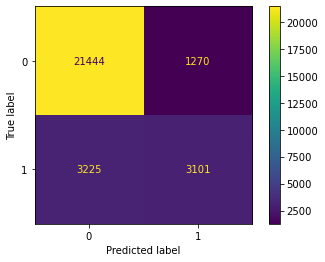

In [60]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr_clf, X_test, y_test)

# Visualize the Performance of the (Logistic Regression) Model

Text(0, 0.5, 'True Positive Rate')

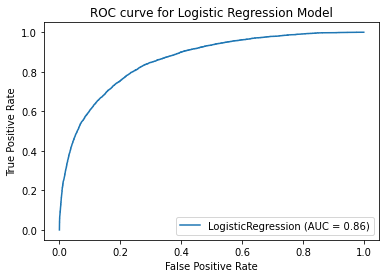

In [62]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(lr_clf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [69]:
# XGBoost

xgb_clf=XGBClassifier()

# Train the dataset
xgb_clf = xgb_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = xgb_clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',c_matrix)

# Accuracy
xgb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",xgb_accuracy)

print('\n',classification_report(y_test,y_pred))

[20:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Confusion matrix:
 [[21426  1288]
 [ 2990  3336]]
Accuracy: 85.27

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     22714
           1       0.72      0.53      0.61      6326

    accuracy                           0.85     29040
   macro avg       0.80      0.74      0.76     29040
weighted avg       0.84      0.85      0.84     29040



# Confusion Martix (XGBoost Classifier)

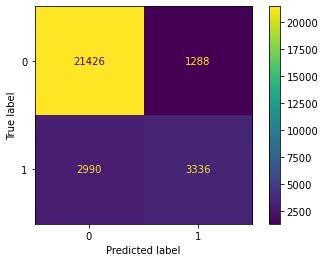

In [70]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, X_test, y_test)

# Visualize the Performance of the (XGBoost Classifier) Model

Text(0, 0.5, 'True Positive Rate')

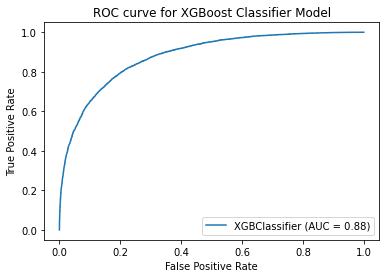

In [71]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(xgb_clf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for XGBoost Classifier Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

In [72]:
# Naive Byes

nb_clf = GaussianNB() # Naive Byes

# Train the dataset
nb_clf = nb_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = nb_clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
nb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:",nb_accuracy)

print('\n',classification_report(y_test,y_pred))

Confusion matrix:
 [[18610  4104]
 [ 2160  4166]]
Accuracy: 78.43

               precision    recall  f1-score   support

           0       0.90      0.82      0.86     22714
           1       0.50      0.66      0.57      6326

    accuracy                           0.78     29040
   macro avg       0.70      0.74      0.71     29040
weighted avg       0.81      0.78      0.79     29040



# Confusion Martix (Naive Byes)

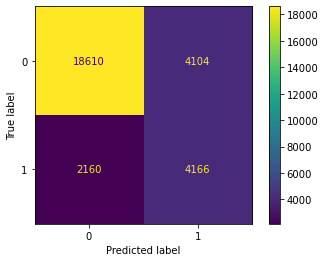

In [73]:
#Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_clf, X_test, y_test)

# Visualize the Performance of the (Naive Byes) Model

Text(0, 0.5, 'True Positive Rate')

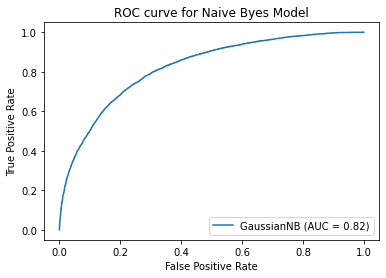

In [74]:
# Visualize the Performance of the Model

metrics.plot_roc_curve(nb_clf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 
plt.title('ROC curve for Naive Byes Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')

# Model Evaluation

In [75]:
model_ev = pd.DataFrame({'Model': ['Decision Tree Classifier','Decision Tree Classifier (Entropy)',
                                   'Decision Tree Classifier (Gini)','Random Forest',
                                   'Logistic Regression','Extreme Gradient Boost','Naive Bayes'],
                                    'Accuracy': [dt1_accuracy,dt2_accuracy,dt3_accuracy, rf_accuracy, lr_accuracy,
                                    xgb_accuracy, nb_accuracy]})
model_ev


,Model,Accuracy
0,Decision Tree Classifier,78.37
1,Decision Tree Classifier (Entropy),83.48
2,Decision Tree Classifier (Gini),84.12
3,Random Forest,85.33
4,Logistic Regression,84.52
5,Extreme Gradient Boost,85.27
6,Naive Bayes,78.43


# Model Evaluation & Comparative Analysis of the all  Algorithms

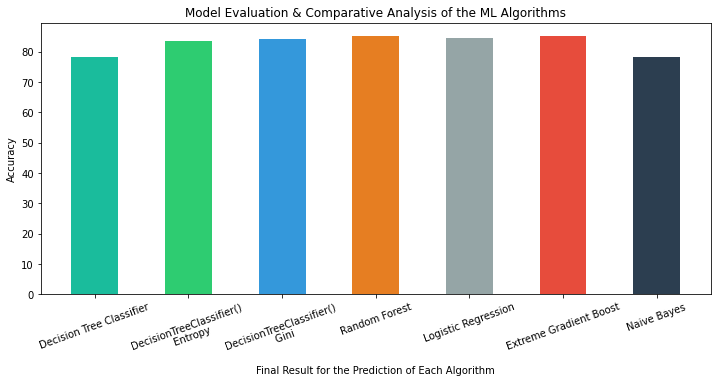

In [82]:
# Model Evaluation & Comparative Analysis

data_dict = {'Decision Tree Classifier':78.37, 'DecisionTreeClassifier()\n Entropy':83.48, 
              'DecisionTreeClassifier()\n Gini': 84.12, 
              'Random Forest':85.33, 'Logistic Regression':84.52, 'Extreme Gradient Boost':85.27, 'Naive Bayes':78.43
             }
algms = list(data_dict.keys())
accuracy = list(data_dict.values())
fig = plt.figure(figsize = (12, 5))
#  Bar plot
plt.bar(algms, accuracy, color=("#1abc9c", "#2ecc71", "#3498db","#e67e22","#95a5a6","#e74c3c", "#2c3e50"),
        width = 0.50)
plt.xlabel("Final Result for the Prediction of Each Algorithm")
plt.xticks(rotation=20)
plt.ylabel("Accuracy")
plt.title("Model Evaluation & Comparative Analysis of the ML Algorithms" )
plt.show()

<p> Here, We applied <b> Five Machine learning algorithms,</b> We can conclude that <b> Random Forest classifier performs the best with 85.33% accuracy </b> </p>